#  Age Detection of an Indian actors

### Problem Statement
Facial feature analysis has always been a topic of interest mainly due to its applicability. Deep Learning techniques are now making it possible for face analysis to be not just a dream but a reality. This practice problem is get you more acquainted with deep learning.You have to detect age group of an Indian actors

### Data Description
 Indian Movie Face database (IMFDB) is a large unconstrained face database consisting of 34512 images of 100 Indian actors collected from more than 100 videos. All the images are manually selected and cropped from the video frames resulting in a high degree of variability interms of scale, pose, expression, illumination, age, resolution, occlusion, and makeup. IMFDB is the first face database that provides a detailed annotation of every image in terms of age, pose, gender, expression and type of occlusion that may help other face related applications.
 
 Data Link - http://cvit.iiit.ac.in/projects/IMFDB/

### Potential use cases/ Applications 
1. Analysis of Facial Images across Age Progression by Humans
2. To detecting uncounsious patients in hospitals
3. To categorize Adhar Card photo
4. To categorize data in human gatherings, such as holy Kumbha mela, Mecca
5. To analyze and focus age group of consumers in large business

### Step by Step Procedure
[1]To categorize images into three class,(YOUNG, MIDDLE, OLD) we took a empty list and append each image using for  loop with image ID from .csv file.
[2]Then we scale all image pixel into range (0,1) for avoiding large values in cost function. 
[3]To procced on network we did label encoding of all images.
[4]Then created a fully connected "Convolutional Neural Network" using keras.
In which three of Convo2D is used  to perform Convolution Operation, Pooling method  used is max pooling. Dropout is used to avoid overfitting.
[5]Then added two layers of Deep neural Network with softmax function to classify images.
[6]Then for back propogation, optimizer used is Gradient Descent. 
[7]At last the model is trained with batch size of 128 and 15 epochs.

In [91]:
import os
import random
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from scipy.misc import imread
from scipy.misc import imresize
from keras.optimizers import SGD, Adam, Adamax
import tensorflow as tf
import cv2

In [21]:
root_dir = os.path.abspath('.')
data_dir = ''

In [22]:
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [23]:
temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (64,64))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


In [24]:
train_x = np.stack(temp) 

In [25]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (64,64))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


In [26]:
test_x = np.stack(temp) 

In [27]:
train_x = train_x / 255.
test_x = test_x / 255.
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [28]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [29]:
epochs = 15
batch_size = 128

model = Sequential()
model.add(Convolution2D(32, (3, 3),  padding='valid',activation='relu', input_shape=(64,64,3)))

model.add(Convolution2D(16, (3, 3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(8, (3, 3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))




model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 8)        

In [30]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/15
19906/19906 [==============================] - 91s 5ms/step - loss: 0.8876 - accuracy: 0.5873
Epoch 2/15
19906/19906 [==============================] - 88s 4ms/step - loss: 0.7739 - accuracy: 0.6580
Epoch 3/15
19906/19906 [==============================] - 86s 4ms/step - loss: 0.7391 - accuracy: 0.6778
Epoch 4/15
19906/19906 [==============================] - 68s 3ms/step - loss: 0.7132 - accuracy: 0.6901
Epoch 5/15
19906/19906 [==============================] - 49s 2ms/step - loss: 0.6883 - accuracy: 0.7033
Epoch 6/15
19906/19906 [==============================] - 50s 3ms/step - loss: 0.6729 - accuracy: 0.7125
Epoch 7/15
19906/19906 [==============================] - 53s 3ms/step - loss: 0.6441 - accuracy: 0.7261
Epoch 8/15
19906/19906 [==============================] - 47s 2ms/step - loss: 0.6228 - accuracy: 0.7358
Epoch 9/15
19906/19906 [==============================] - 46s 2ms/step - loss: 0.6059 - accuracy: 0.7455
Epoch 10/15
19906/19906 [==============================

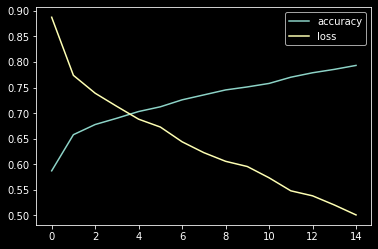

In [31]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['loss'], label='loss')
plt.legend()
plt.show()
plt.style.use('dark_background')

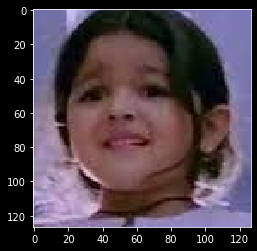

In [144]:
Young_img  = cv2.imread('1.png')
img = cv2.cvtColor(Middle_img,cv2.COLOR_BGR2RGB) 
plt.imshow(img) 

In [143]:
classes = ['MIDDLE','YOUNG','OLD']
img_path = '1.png'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
MaxPosition=np.argmax(preds)  
prediction_label=classes[MaxPosition]
print("Image is:",prediction_label) 

Image is: YOUNG


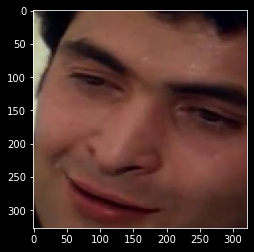

In [123]:
Middle_img  = cv2.imread('3166.jpg')
img = cv2.cvtColor(Young_img,cv2.COLOR_BGR2RGB) 
plt.imshow(img) 

In [124]:
classes = ['MIDDLE','YOUNG','OLD']
img_path = '3166.jpg'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
MaxPosition=np.argmax(preds)  
prediction_label=classes[MaxPosition]
print("Image is:",prediction_label)

Image is: MIDDLE


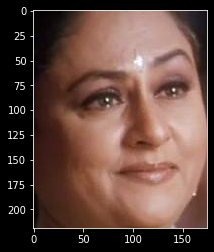

In [132]:
Old_img  = cv2.imread('332.jpg')
img = cv2.cvtColor(Middle_img,cv2.COLOR_BGR2RGB) 
plt.imshow(img) 

In [131]:
classes = ['MIDDLE','YOUNG','OLD']
img_path = '332.jpg'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
MaxPosition=np.argmax(preds)  
prediction_label=classes[MaxPosition]
print("Image is:",prediction_label)

Image is: OLD


### Project made by-
1. Vaibhav Dhake
2. Dhanashree Fale
3. Shruti Atkore
4. Sarang Deshmukh